<a href="https://colab.research.google.com/github/ajaythakur3369/Coding-Samurai-Internship/blob/main/Iris_Flowers_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Iris Flowers Classification**
## **Developed By - Ajay Thakur (ajaythakur3369@gmail.com)**
## **Branch Name - Electronics and Communication Engineering**
## **Institute Name - Indian Institute of Information Technology Kota**
## **Submitted To - Coding Samurai**
## **Project Link (GitHub) - [Click here](https://github.com/ajaythakur3369/Coding-Samurai-Internship)**

# **Problem Statement -**

**Create a simple machine-learning model to predict the species of flowers based on their features, using the famous Iris dataset. This dataset contains measurements of four features (sepal length, sepal width, petal length, and petal width) for three different species of iris flowers (setosa, versicolor, and virginica).**

Project Title: Flower Species Prediction

Project Description: In this project, you will create a simple machine learning model to predict the species of flowers based on their features. You can utilize the famous Iris dataset, which comprises measurements of four features (sepal length, sepal width, petal length, and petal width) for three different species of iris flowers (setosa, versicolor, and virginica).

Steps:

1. Data Collection: Download the Iris dataset, readily available in many machine learning libraries such as scikit-learn or seaborn.

2. Data Exploration: Explore the dataset to understand its structure, the distribution of data points, and the relationship between the features and the target variable (flower species).

3. Data Preprocessing: Preprocess the data by handling missing values (if any), encoding the categorical target variable (species), and splitting the dataset into a training set and a testing set.

4. Model Selection: Choose a simple machine learning algorithm like Logistic Regression or Decision Tree Classifier for this beginner project. You can explore more complex algorithms later as you gain experience.

5. Model Training: Train the selected model using the training dataset. This involves feeding the model with input features (sepal length, sepal width, petal length, and petal width) and the corresponding target labels (flower species).

6. Model Evaluation: Evaluate the model's performance using the testing dataset. Common evaluation metrics for classification tasks include accuracy, precision, recall, and F1-score.

7. Prediction: Use the trained model to make predictions on new data points (flower measurements). You can create a simple command-line interface or a basic web application where users can input the measurements, and your model predicts the flower species.

8. Visualization: Create visualizations such as scatter plots, confusion matrices, or bar charts to help you and others understand how well the model is performing.

9. Model Tuning: Experiment with different hyperparameters of the model to see if you can improve its performance. This step will give you insight into hyperparameter tuning.

10. Documentation: Keep detailed notes on your project, including the steps you took, challenges you faced, and any improvements you made. Documenting your work is essential for learning and future reference.

Iris Flower Classification

We are attempting to solve a multi-class problem using attributes of flowers to predict the species. Specifically, we aim to use the sepal length, sepal width, petal length, and petal width to predict if an iris flower belongs to the Setosa, Versicolor, or Virginica species.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

About the Dataset

Context: The Iris flower dataset is a multivariate dataset introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems." It is sometimes referred to as Anderson's Iris dataset because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The dataset comprises 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and width of the sepals and petals, in centimeters.

This dataset has become a standard test case for many statistical classification techniques in machine learning, such as support vector machines.

Content: The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal Width, and Class (Species).

Acknowledgements: This dataset is freely available and publicly accessible at the UCI Machine Learning Repository.

In [ ]:
# Access the Drive from Colab to access the file
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebook/Internship_Name/Coding_Samurai/File_Name/Iris_flowers_dataset.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 6)

In [ ]:
df = df.drop(['Id'], axis = 1)

In [ ]:
df.sample(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
39,5.1,3.4,1.5,0.2,Iris-setosa
139,6.9,3.1,5.4,2.1,Iris-virginica
42,4.4,3.2,1.3,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
print(df.columns)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


EDA

In [ ]:
sns.set_palette('pastel')

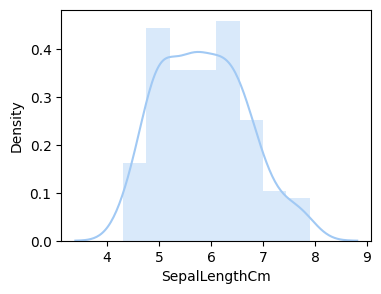

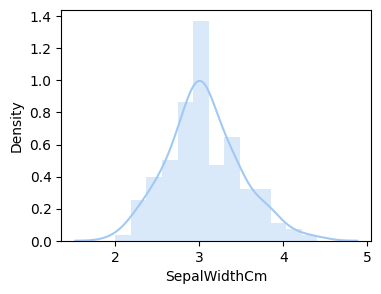

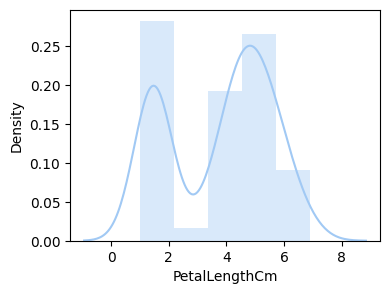

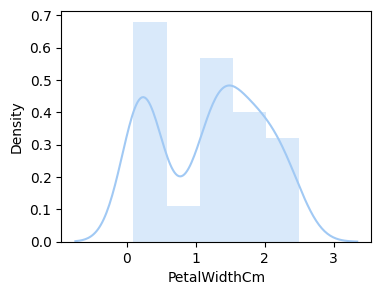

In [ ]:
for col in df.columns[:-1]:
    plt.figure(figsize = (4, 3))
    sns.distplot(df[col])
    plt.show()

In [ ]:
print(df.columns)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


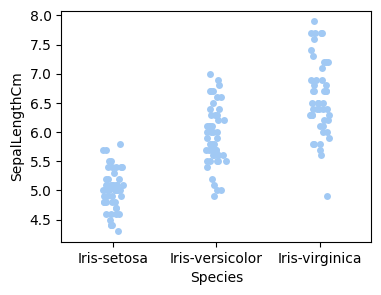

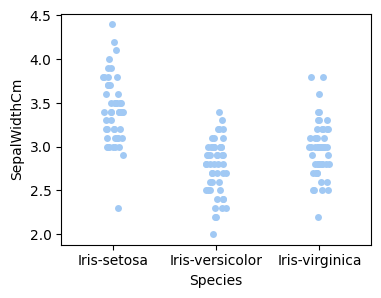

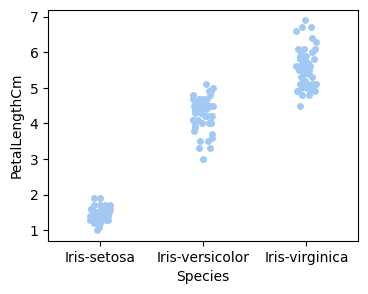

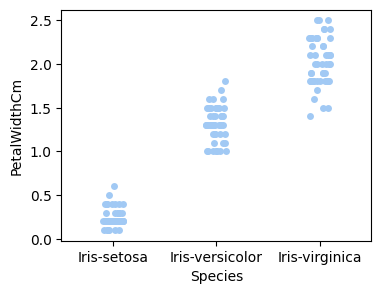

In [ ]:
# Assuming 'df' is your DataFrame
# Select the numeric columns
numeric_columns = df.select_dtypes(include = ['number']).columns

for col in numeric_columns:
    plt.figure(figsize = (4, 3))
    sns.stripplot(data = df, x = 'Species', y = col, jitter = True)
    plt.show()

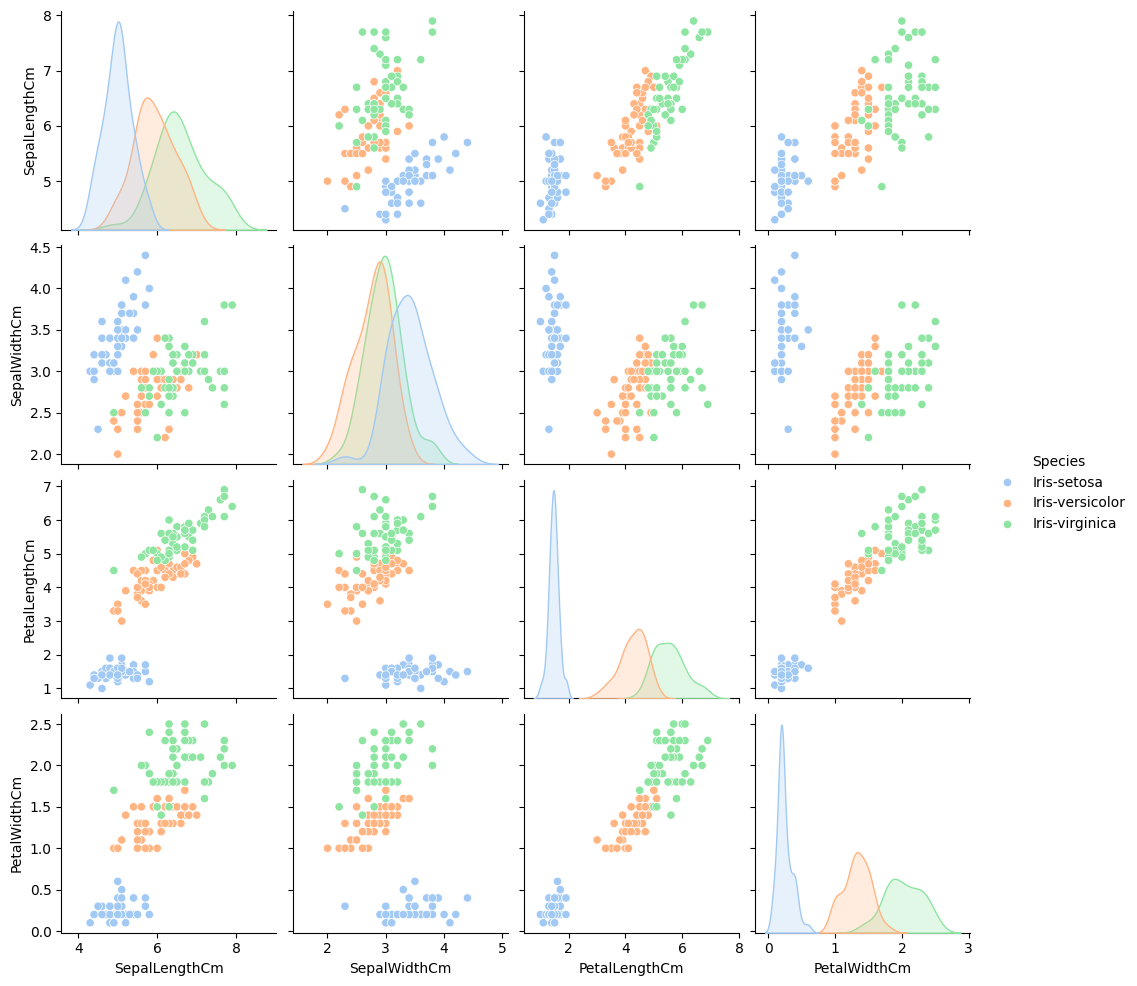

In [ ]:
# Assuming 'df' is your DataFrame
sns.pairplot(df, hue = 'Species')
plt.show()

In [ ]:
# Assuming 'df' is your DataFrame
# Option 1: Drop non-numeric columns
numeric_df = df.drop(columns = ['Species'])

# Option 2: Encode categorical data
encoded_df = pd.get_dummies(df, columns = ['Species'])

# Now compute the correlation matrix
cor_matrix = numeric_df.corr()
cor_matrix

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


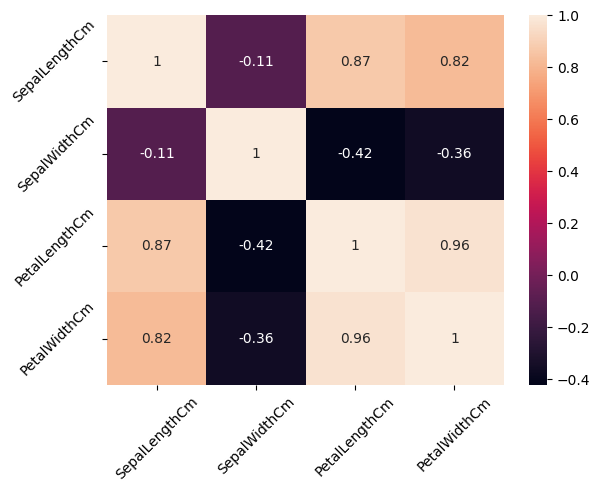

In [ ]:
sns.heatmap(cor_matrix, annot = True)
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
x = df.drop(['Species'], axis=1)
y = df['Species']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'x_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (120, 4)
x_test shape: (30, 4)
x_train shape: (120,)
y_test shape: (30,)


In [ ]:
trf1 = ColumnTransformer([
    ('scaling', StandardScaler(), [0, 1, 2, 3])
])
pipe = Pipeline([
    ('trf1', trf1)
])
pipe

Pipeline(steps=[('trf1',
                 ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                                  [0, 1, 2, 3])]))])

In [ ]:
x_train_process = pipe.fit_transform(x_train)
x_train_process[0]

x_test_process = pipe.transform(x_test)
x_test_process[0]

array([ 0.35451684, -0.57925837,  0.5576453 ,  0.02332414])

Model Training

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train_process, y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(x_test_process)
print(f'accuracy_score: {accuracy_score(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

accuracy_score: 1.0


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

Implement k-fold cross-validation

In [ ]:
k_fold = 5
accuracy = cross_val_score(logreg, x_train_process, y_train, scoring = 'accuracy', cv = k_fold)
mean_accuracy = np.mean(accuracy)
print(mean_accuracy)

0.9583333333333334


Hyperparameter Tuning

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator = logreg, param_grid = param_grid, scoring = 'accuracy', cv = 5)

# Perform the grid search on your data
grid_search.fit(x_train_process, y_train)

# Print the best hyperparameters and their corresponding best score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy Score: ", grid_search.best_score_)

Best Hyperparameters:  {'C': 1, 'penalty': 'l2'}
Best Accuracy Score:  0.9583333333333334


Model Selection

Classification Task:

* Logistic Regression
* Decision Tree Classifier
* Random Forest
* Support Vector Machine (SVM)

In [ ]:
# Initialize and train the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Create an empty list to store results
results = []

for model_name, model in models.items():
    # Train the model
    model.fit(x_train_process, y_train)

    # Predict on test data
    predictions = model.predict(x_test_process)

    # Calculate metrics
    accuracy = accuracy_score(y_test, predictions)

    print('For ', model_name)
    print('accuracy: ', accuracy)
    print('---------------------------------->')

    results.append({'Model': model_name, 'Accuracy': accuracy})
results_df = pd.DataFrame(results)

For  Logistic Regression
accuracy:  1.0
---------------------------------->
For  Decision Tree
accuracy:  1.0
---------------------------------->
For  Random Forest
accuracy:  1.0
---------------------------------->
For  SVM
accuracy:  1.0
---------------------------------->


In [ ]:
results_df

,Model,Accuracy
0,Logistic Regression,1.0
1,Decision Tree,1.0
2,Random Forest,1.0
3,SVM,1.0


Hyperparameter Tuning and perform cross-validation

In [ ]:
# Define the hyperparameter grids for each model
pg_logreg = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2']
    }

pg_dt = {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }

pg_rf = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }

pg_svm = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }


# Initialize models with GridSearchCV
models_with_params = {
    'Logistic Regression':(LogisticRegression(), pg_logreg),
    'Decision Tree': (DecisionTreeClassifier(), pg_dt),
    'Random Forest': (RandomForestClassifier(), pg_rf),
    'SVM': (SVC(), pg_svm)
}
tuned_results = []

for model_name, (model, param_grid) in models_with_params.items():
    grid_search = GridSearchCV(model, param_grid, scoring = 'accuracy', cv = 5)
    grid_search.fit(x_train_process, y_train)

    # Best hyperparameters
    best_params = grid_search.best_params_

    # Best model
    best_model = grid_search.best_estimator_
    best_model.fit(x_train_process, y_train)

    y_pred = best_model.predict(x_test_process)
    accuracy = accuracy_score(y_test, y_pred)

    # Cross-validation
    cv_scores = cross_val_score(best_model, x_train_process, y_train, cv = 5, scoring = 'accuracy')
    mean_accuracy = cv_scores.mean()

    print(model_name)
    print(f'accuracy: {accuracy}')
    print(f'cv_scores: {cv_scores}')
    print(f'mean_accuracy: {round(mean_accuracy, 3)}')
    print(f'best_params: {best_params}')
    print('---------------------------------------> ')

    tuned_results.append({'Model': model_name,
                          'Accuracy': accuracy,
                          'mean_accuracy': mean_accuracy,
                          'cv_scores': cv_scores,
                          'Best Hyperparameters': best_params})

Logistic Regression
accuracy: 1.0
cv_scores: [0.95833333 1.         0.875      1.         0.95833333]
mean_accuracy: 0.958
best_params: {'C': 1, 'penalty': 'l2'}
---------------------------------------> 
Decision Tree
accuracy: 1.0
cv_scores: [1.         0.95833333 0.875      0.95833333 0.95833333]
mean_accuracy: 0.95
best_params: {'max_depth': 20, 'min_samples_split': 2}
---------------------------------------> 
Random Forest
accuracy: 1.0
cv_scores: [0.95833333 1.         0.875      1.         0.95833333]
mean_accuracy: 0.958
best_params: {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 100}
---------------------------------------> 
SVM
accuracy: 0.9666666666666667
cv_scores: [0.95833333 1.         0.83333333 1.         1.        ]
mean_accuracy: 0.958
best_params: {'C': 10, 'kernel': 'linear'}
---------------------------------------> 


In [ ]:
# Create a DataFrame with model name, accuracy, and best parameters
tuned_df = pd.DataFrame(tuned_results)
tuned_df

,Model,Accuracy,mean_accuracy,cv_scores,Best Hyperparameters
0,Logistic Regression,1.000000,0.958333,"[0.9583333333333334, 1.0, 0.875, 1.0, 0.958333...","{'C': 1, 'penalty': 'l2'}"
1,Decision Tree,1.000000,0.950000,"[1.0, 0.9583333333333334, 0.875, 0.95833333333...","{'max_depth': 20, 'min_samples_split': 2}"
2,Random Forest,1.000000,0.958333,"[0.9583333333333334, 1.0, 0.875, 1.0, 0.958333...","{'max_depth': 30, 'min_samples_split': 5, 'n_e..."
3,SVM,0.966667,0.958333,"[0.9583333333333334, 1.0, 0.8333333333333334, ...","{'C': 10, 'kernel': 'linear'}"


In [ ]:
tuned_data = pd.melt(tuned_df, id_vars = 'Model').iloc[:8, :]
tuned_data

,Model,variable,value
0,Logistic Regression,Accuracy,1.0
1,Decision Tree,Accuracy,1.0
2,Random Forest,Accuracy,1.0
3,SVM,Accuracy,0.966667
4,Logistic Regression,mean_accuracy,0.958333
5,Decision Tree,mean_accuracy,0.95
6,Random Forest,mean_accuracy,0.958333
7,SVM,mean_accuracy,0.958333


<Axes: xlabel='Model', ylabel='mean_accuracy'>

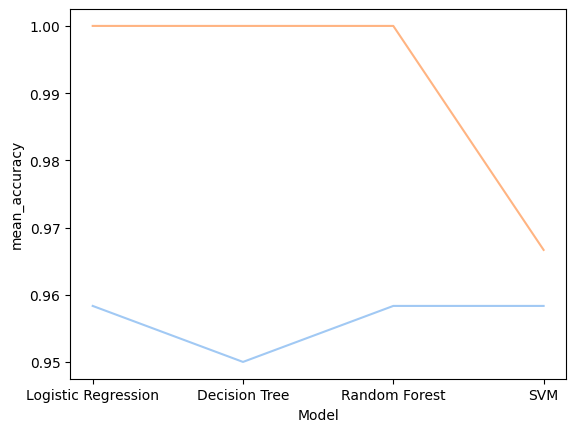

In [ ]:
sns.lineplot(data = tuned_df, x = 'Model', y = 'mean_accuracy')
sns.lineplot(data = tuned_df, x = 'Model', y = 'Accuracy')

We can see that the Decision Tree model is consistently performing well on k-fold cross-validation. We can conclude that it performs better in the given scenario. A model with consistent high accuracy on k-fold cross-validation is generally a good choice because it's less likely to be overfitting or providing results influenced by randomness.

In [ ]:
import pickle

# Best-performing model (decision tree)
best_model_row = tuned_df[tuned_df['Model'] == 'Decision Tree'].iloc[0]
best_hyperparameter = best_model_row['Best Hyperparameters']

# Train the model
best_model = DecisionTreeClassifier(**best_hyperparameter)
best_model.fit(x_train_process, y_train)

# Save preprocessing
with open('pipe.pkl', 'wb') as pipe_file:
    pickle.dump(pipe, pipe_file)

# Save the trained decision tree model
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

print('Pipeline and model saved successfully!')

Pipeline and model saved successfully!


Loading pipeline and model and predicting on values

In [ ]:
import pickle
# Loading the best model
with open('best_model.pkl', 'rb') as model_file:
    best_model = pickle.load(model_file)

# Loading the pipeline
with open('pipe.pkl', 'rb') as pipe_file:
    pipe = pickle.load(pipe_file)
df.sample(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
71,6.1,2.8,4.0,1.3,Iris-versicolor
93,5.0,2.3,3.3,1.0,Iris-versicolor
23,5.1,3.3,1.7,0.5,Iris-setosa


In [ ]:
new = [[float(input()) for _ in range(4)]]
new_process = pipe.transform(new)
print('after_processing: ', new_process)
y_pred = best_model.predict(new_process)
if y_pred == 0:
    print('Iris-Setosa')
elif y_pred == 1:
    print('iris-Vesicolor')
else:
    print('Iris-virginica')

2.3
4.5
3.3
5.1
after_processing:  [[-4.27756569  3.24497163 -0.24513457  5.22127424]]
Iris-virginica
